# Modules
To visualize data in python, we will be using an external module called [plotnine](https://plotnine.readthedocs.io/en/stable/). Instead of importing the whole module, we will import only the objects that we need. We also need to import numpy and pandas, using the same aliases as before.

In [2]:
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_line, geom_boxplot, geom_bar, geom_histogram, geom_tile, geom_text, stat_smooth, facet_wrap, theme_matplotlib, theme_minimal, theme_xkcd

# Basic visualization
With plotnine, you can build a plot using only 2 lines of code:

1. **ggplot()**: this creates a plot object, and holds the details of which variables will be displayed on which axes
2. **geom**: this specifies the kind of plot that will be created

And that's it! This structure is called the grammar of graphics, and it is used by other plotting libraries in other languages, such as ggplot in R.

## Input data
To keep things simple, we will use an artificial dataset to start with. We can make this with pandas, as covered in the previous session:

In [3]:
example = pd.DataFrame([
    {"City":"Manchester", "Year":1980, "Rainfall":200},
    {"City":"Manchester", "Year":1990, "Rainfall":190},
    {"City":"Manchester", "Year":2000, "Rainfall":160},
    {"City":"Manchester", "Year":2010, "Rainfall":170},
    {"City":"London", "Year":1980, "Rainfall":100},
    {"City":"London", "Year":1990, "Rainfall":90},
    {"City":"London", "Year":2000, "Rainfall":60},
    {"City":"London", "Year":2010, "Rainfall":70},
])
example

,City,Year,Rainfall
0,Manchester,1980,200
1,Manchester,1990,190
2,Manchester,2000,160
3,Manchester,2010,170
4,London,1980,100
5,London,1990,90
6,London,2000,60
7,London,2010,70


## Scatter plot
The first plot we will create is a scatter plot, which uses the **geom_point()** geom. The important points to note in the code below are:

- the whole chunk of code needs to be encapsulated in brackets (I have put these on separate lines to make it easier to track which brackets contain which pieces of code)
- the first argument to **ggplot()** is always the dataframe containing the data to be plotted
- the second argument to **ggplot()** is always the **aes()** object, which contains the variables to be used for the *x axis*, *y axis*, plot *fill* and plot *colour*. These should always be specified in that order.

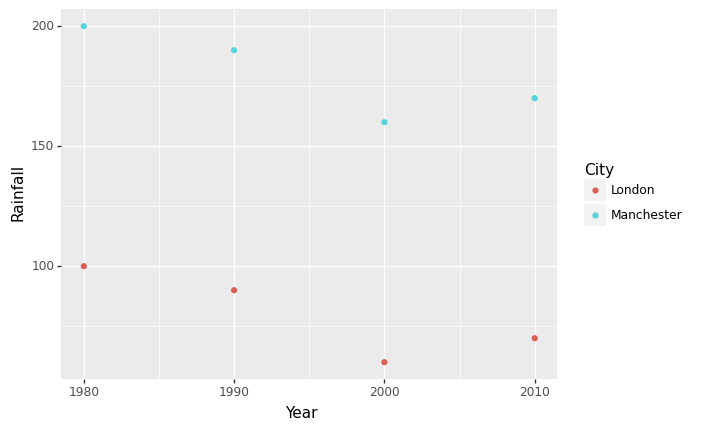

<ggplot: (-9223371904577809924)>

In [27]:
(
# create the plot object, and specify which variables should be placed on the x & y axes, and which should be used to fill and colour the plot
ggplot(example, aes("Year", "Rainfall", fill = "City", colour="City"))
    # specify a scatter plot
    + geom_point()
)

## Line plot
To create a line plot, we can use the same **ggplot()** call as we used for the scatter plot above, and this will keep the same variables for the *x*, *y*, *colour* and *fill*. The only thing that needs to change about the code is the **geom**. In this case, we will use **geom_line()**:

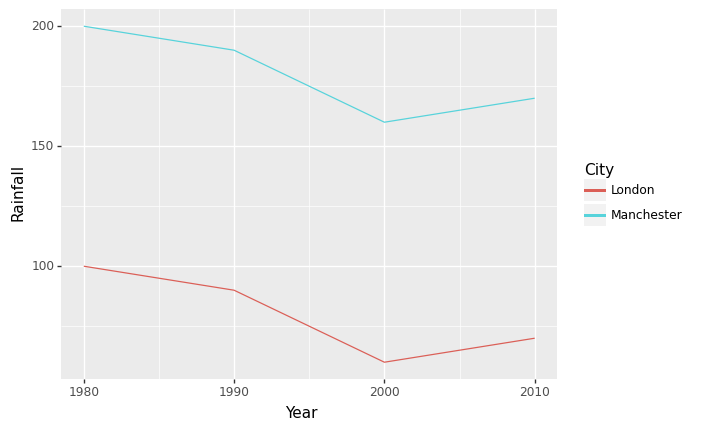

<ggplot: (-9223371904578069064)>

In [37]:
(
# the ggplot call is exactly the same as the scatter plot
ggplot(example, aes("Year", "Rainfall", fill="City", colour="City"))
    # specify a line plot
    + geom_line()
)

## Box plot
To create a box plot, the only thing that needs to change about the code above is the **geom**. In this case, we will use **geom_box()**:

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


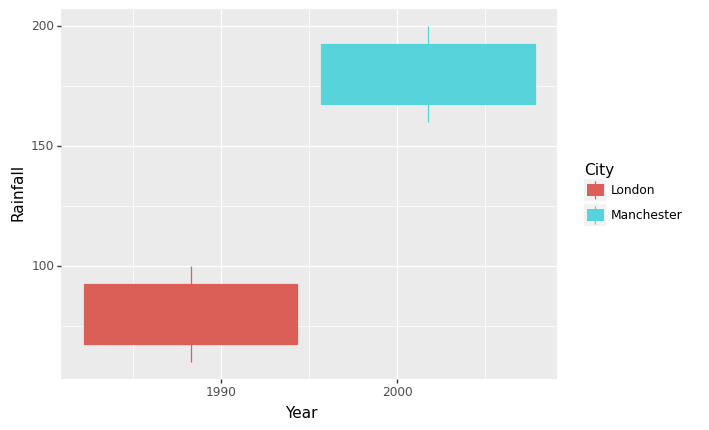

<ggplot: (-9223371904578429196)>

In [36]:
(
# the ggplot call is exactly the same as the scatter plot
ggplot(example, aes("Year", "Rainfall", fill="City", colour="City"))
    # specify a box plot
    + geom_boxplot()
)

## Bar chart
To create a bar chart, we again only need to change the **geom**. In this case, we will use **geom_bar()**. However, by default **geom_bar()** will try to count the occurrences of the variable on the x axis, and plot a histogram. To override this and make **geom_bar()** plot the raw values of the y axis variable, we use the *stat* argument:

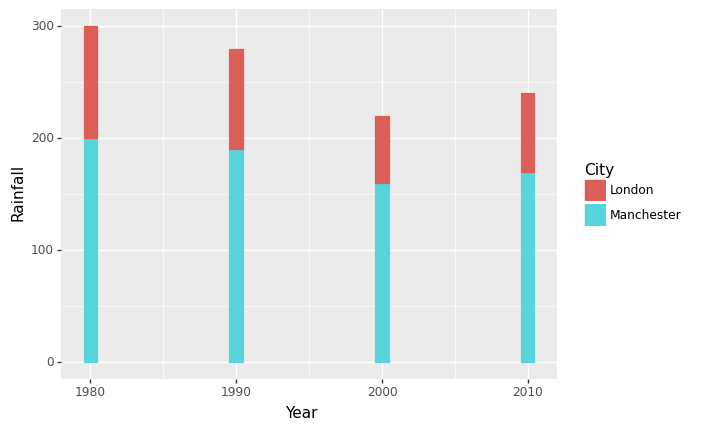

<ggplot: (-9223371904577790728)>

In [29]:
(
# the ggplot call is exactly the same as the scatter plot
ggplot(example, aes("Year", "Rainfall", fill="City", colour="City"))
    # specify a bar chart
    + geom_bar(stat="identity")
)

By default **geom_bar()** stacks the bars for the same x axis variable on top of each other, but we can place them next to each other by using the *position* argument:

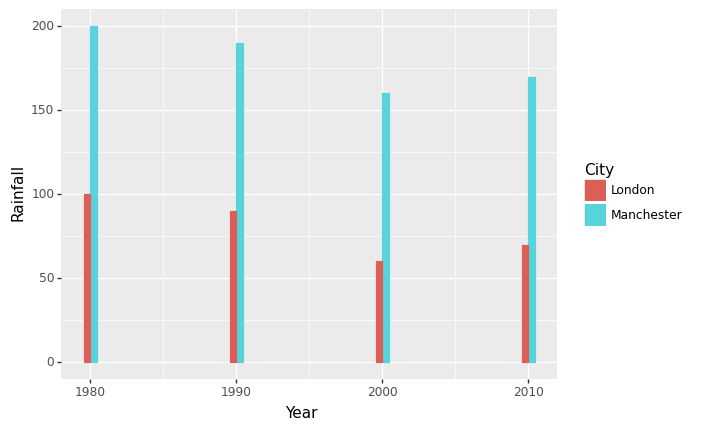

<ggplot: (-9223371904578327288)>

In [38]:
(
# the ggplot call is exactly the same as the scatter plot
ggplot(example, aes("Year", "Rainfall", fill="City", colour="City"))
    # specify a bar chart
    + geom_bar(stat="identity", position="dodge")
)

## Histograms
Histograms can be very useful to visualize the distribution of a variable. To generate a histogram, we use **geom_histogram**. An important difference between this plot and the previous plots is that for histograms, we only specify the x axis variable within the **aes()** object, and we leave out the y axis variable:

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 2'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


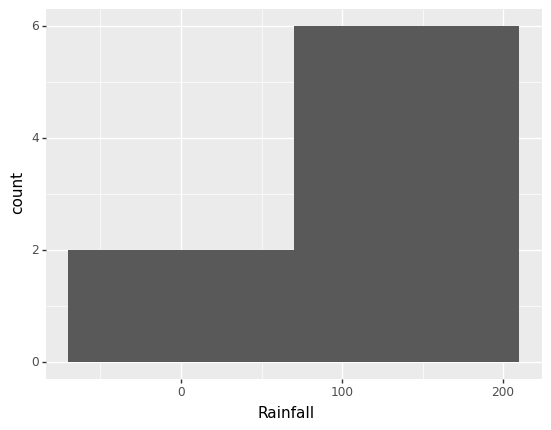

<ggplot: (-9223371919048435388)>

In [30]:
(
# the aes object contains only the variable that will be plotted on the x axis i.e. the one for which we want to generate a distribution
ggplot(example, aes("Rainfall"))
    # specify a histogram
    + geom_histogram()
)

# Advanced visualization
## Input data
To create some more advanced plots, we will use a more complex dataset: the diamonds dataset that comes bundled with plotnine

In [72]:
from plotnine import data
diamonds = data.diamonds
# there are a few very high quality diamonds, but we want to remove these before plotting
diamonds = diamonds[diamonds["carat"]<=2.5]
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120


## Layered plots
As shown in the last section, a variety of simple plots can be generated by changing just the **geom**. However, we can construct more complex plots by layering different **geoms** on top of each other. This is particularly useful when we want to highlight a broad pattern in a noisy dataset: we can use one layer to display a line to visualize a model fit to the data, and another layer to show the raw data in the background. There are two things worth noting here:
1. By passing the *colour* and *size* arguments to **geom_point()** we can specify the colour and size of the points
2. We are using the **stat_smooth()** layer to plot a line of model fit on top of the raw data, and passing the *method* argument to use a specific model

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


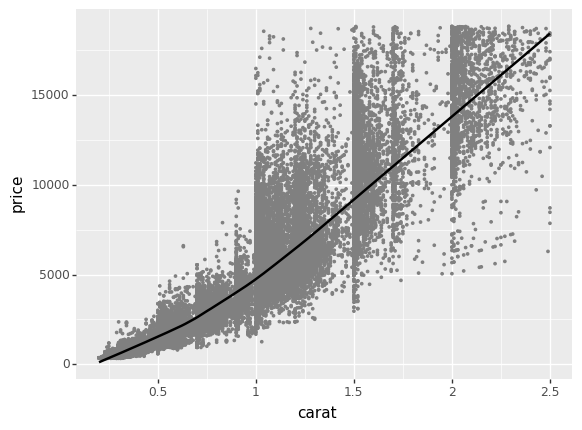

<ggplot: (-9223371919145051120)>

In [83]:
(
ggplot(diamonds, aes("carat", "price"))
 + geom_point(colour="grey", size=0.5)
 + stat_smooth(method="lowess")
)

## Faceted plots
When a large dataset contains a discrete variable, it can be useful to generate separate plots for each value of the discrete variable, so that we can tease apart patterns that might only be present in a subset of the data. For example, the diamonds dataset has a number of different cuts, but each cut might have a different price distribution. In plotnine, separate plots can be generated by creating a **faceted** plot, where each facet represents a different subset of the data. To do this, we add the **facet_wrap()** parameter to the plot. The arguments that we pass the **facet_wrap()** are very important:
1. The first argument must always be the variable tha we want to generate separate plots for, and we must always add a "~" before it
2. We can use the *scales* argument to make the range of the x axis, y axis, or both axes independent of each other. The default is to use the same axis ranges for all facets, but when there is wide variation in a variable it can be useful to make them independent. In this case there are far fewer diamonds of a Fair cut than any others, so specifying independent y axis ranges allows us to see the Fair diamond price distribution more clearly

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 81'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


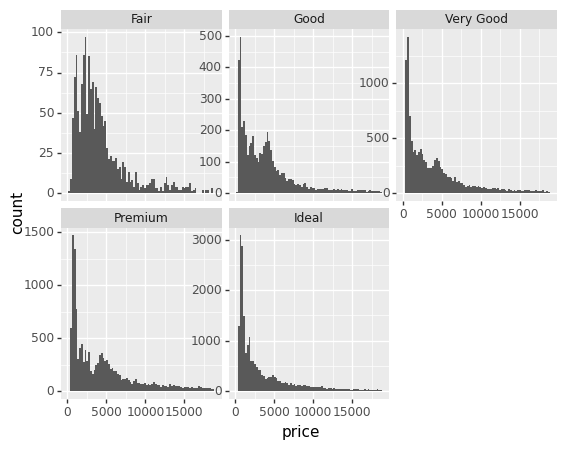

<ggplot: (-9223371919145622620)>

In [74]:
(
ggplot(diamonds, aes("price"))
 + geom_histogram()
 + facet_wrap("~cut", scales="free_y")
)

## Heat maps
When we want to explore the relationship between 2 discrete variables and a continuous variable, a heatmap can be very useful. We use **geom_tile()** to generate a different block for each combination of the discrete variables, and use the *fill* argument in the **aes()** object to specify which continuous variable to use for colouring the heatmap.

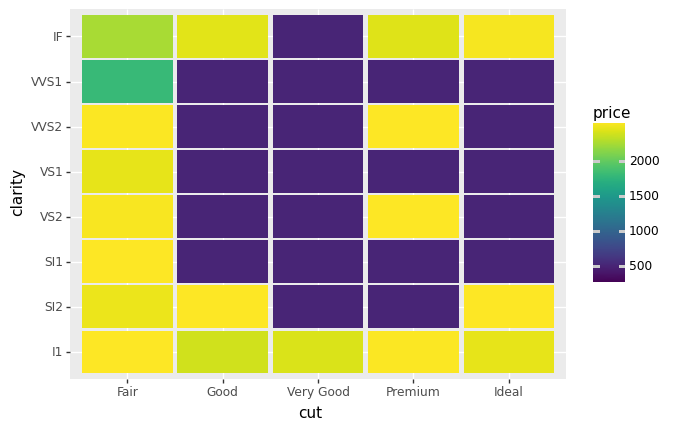

<ggplot: (-9223371919138223668)>

In [75]:
# as the histogram above shows, there are some outliers with very high price, but we want to focus on diamonds with price < 2500
cheap_diamonds = diamonds[diamonds["price"]<2500]
(
ggplot(cheap_diamonds, aes("cut", "clarity", fill="price"))
 + geom_tile(aes(width=0.95, height=0.95))
)

## Themes
In any plot generated by plotnine, many cosmetic details are controlled by the **theme**, including the font, background colour, line thicknesses etc. plotnine comes with a number of pre-defined themes, which allow us to make dramatic changes to how a plot looks by adding just one more line to our existing plotting code. Let's go back to the plot of carat versus price: 

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


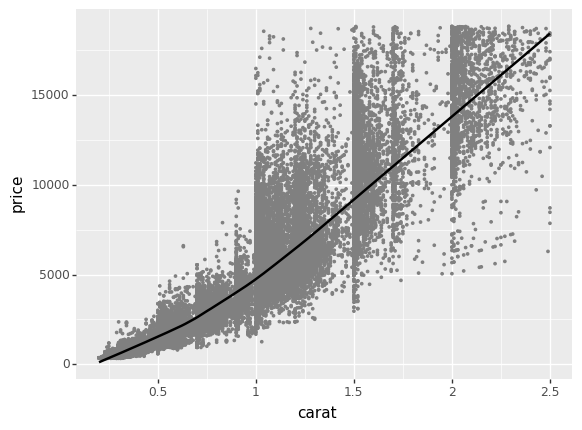

<ggplot: (-9223371919111708432)>

In [84]:
(
ggplot(diamonds, aes("carat", "price"))
 + geom_point(colour="grey", size=0.5)
 + stat_smooth(method="lowess")
)

By using **theme_minimal()** we can remove the minor gridlines, grey background, and axis lines

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


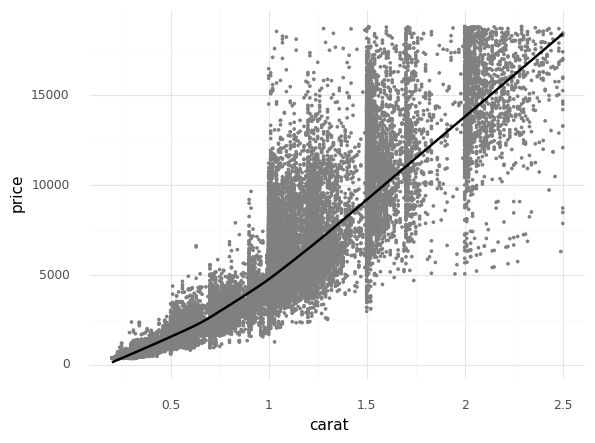

<ggplot: (-9223371919137107380)>

In [85]:
(
ggplot(diamonds, aes("carat", "price"))
 + geom_point(colour="grey", size=0.5)
 + stat_smooth(method="lowess")
 + theme_minimal()
)

**theme_matplotlib()** removes the gridlines and grey background, and add tickmarks and a border to the plot

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\themes\theme.py:250: MatplotlibDeprecationWarning: 
The datapath rcparam was deprecated in Matplotlib 3.2.1 and will be removed two minor releases later.
  rcParams[key] = val
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\themes\theme.py:250: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  rcParams[key] = val
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\themes\theme.py:250: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  rcParams[key] = val
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\themes\theme.py:250: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was 

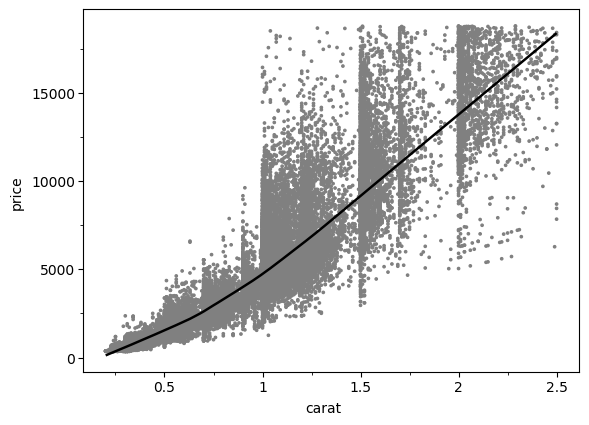

<ggplot: (-9223371919097963848)>

In [86]:
(
ggplot(diamonds, aes("carat", "price"))
 + geom_point(colour="grey", size=0.5)
 + stat_smooth(method="lowess")
 + theme_matplotlib()
)

**theme_xkcd()** gives the plot a hand-drawn feel, following the style of the [xkcd webcomic](https://xkcd.com/)

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


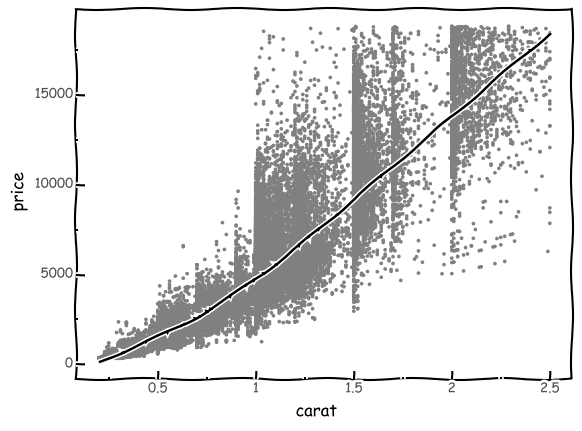

<ggplot: (-9223371919095761528)>

In [87]:
(
ggplot(diamonds, aes("carat", "price"))
 + geom_point(colour="grey", size=0.5)
 + stat_smooth(method="lowess")
 + theme_xkcd()
)

## Further reading
In this session we have seen that plotnine can be used to generate many different plots with very little code. However, we have just scratched the surface of what is possible with this package, and with data visualization in Python more generally. There are many resources that you can use to extend your Python data vizualization skills:
- to see the full range of plot types that can be generated with plotnine, see the [plotnine gallery](https://plotnine.readthedocs.io/en/stable/gallery.html)
- for full details of how each plotnine geom and object works, see the [plotnine API documentation](https://plotnine.readthedocs.io/en/stable/api.html)
- if you want to generate bespoke plots with full control over each plotting element, take a look at the [matplotlib](https://matplotlib.org/) library

## Exercise